In [1]:
import h5py as h5
from PreFRBLE.convenience import *
from PreFRBLE.plot import *

In [2]:
scenario = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18'],
#    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}
scenario = {'IGM': ['alpha1-3rd_C300'], 'Host': ['Heesen11/dirty'], 'Local': ['Piro18/wind']}
scenario = {'IGM': ['alpha1-3rd_C300'], 'Host': ['Rodrigues18'], 'Local': ['Piro18/wind']}
#P, x = GetLikelihood_Telescope( measure='RM', telescope='ASKAP_incoh', population='SFR', **scenario )
#P, x = GetLikelihood_Full( measure='RM', redshift=1.0, **scenario )
with h5.File( '/hummel/PreFRBLE/likelihood/observables_likelihood_Full.h5', 'r') as f:
    P = f[KeyFull( measure='RM', redshift=0.1, axis='P', **scenario )][()]
print(P.shape)

(100,)


In [91]:
def Jackknife( values, function=np.mean, axis=None ):
    """  
    obtain Jackknife estimator
    
    Parameter
    ---------
    values : array-like
        values to be Jackknifed
    axis : integer
        axis along which to Jackknife
    function : function-type
        function to be executed on the samples to find the value to be estimated
        needs keyword axis if axis is used
        
    Returns
    -------
    mean, std : floats
        average and standard deviation of esimates computed by function
    """
    estimates = values.copy()
    
    #N_samples = values.shape[axis] if axis else values.size
    if axis:
        estimates = np.moveaxis( estimates, axis, 0 )
        for i in range(estimates.shape[0]):
            estimates[i] = function( np.delete( values, i, axis=axis), axis=axis )
        estimates = np.moveaxis( estimates, 0, axis  )
    else:
        for i in range(values.size):
            estimates.flat[i] = function( np.delete( values, i ) )        
    return np.nanmean(estimates, axis=axis), np.nanstd(estimates, axis=axis)

def BayesTotalLog( bayes, axis=None ):
    return np.nansum( np.log10(bayes), axis=axis)

def BayesJackknife( bayes, axis=None ):
    """ return log10 of total bayes factor and deviation from Jackknife resampling of bayes factors of individual measurements """
    mean, dev = Jackknife( bayes, BayesTotalLog, axis=axis )
    return mean, dev

In [92]:
bayes = np.random.rand(5,10,2)*2-1

BayesJackknife(bayes, axis=1)


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10


(array([[-1.49585908, -5.2661716 ],
        [-2.12141816, -3.03384672],
        [-1.53542264, -1.10524388],
        [-0.97985295, -2.47202867],
        [-1.66842103, -1.16548813]]), array([[0.4014984 , 1.14498731],
        [0.27965875, 0.50776366],
        [0.20657911, 0.17599479],
        [0.25010649, 0.34133768],
        [0.41386294, 0.26403274]]))

In [1]:
vol = 8.904348008448004e-08
N = 1e6

N*vol

0.08904348008448004

In [47]:
x=None
x = [1]
x[0] if x else 0

1

In [2]:
def WeighBayes( B, w ):
    w_log = np.log10(w)
    return 10.**( np.log10(B) * (1+np.abs(w_log))**(1 - 2*(w_log<0) - (w_log==0) )  ) 

In [3]:
WeighBayes( 10.**np.arange(-3,4), 0.01 )

array([ 0.1       ,  0.21544347,  0.46415888,  1.        ,  2.15443469,
        4.64158883, 10.        ])

In [22]:
def f(x):
    return [x], [x]

a=np.array([1,2,3])
b=[1,2,3]

[a[0]], [b[0]] = f(1)
print(a,b)

def f(x):
    return x, x


for x in range(4):
    a, b = f(x) if x < 2 else (1,2)
    print(a,b)
    

def f(x):
    res = [x,x]
    return res[:1+(x>1)]
a = map( f, range(3) )
for i in a:
    print(i)

[1 2 3] [1, 2, 3]
0 0
1 1
1 2
1 2
[0]
[1]
[2, 2]


In [23]:
non = None

len(non)

TypeError: object of type 'NoneType' has no len()

In [3]:
from matplotlib.cm import YlGn

def Gradient( x=np.linspace(0,1,2), min=None, max=None ):
    """ return rainbow colors for 1D array x """
    if min is None:
        min = x.min()
    if max is None:
        max = x.max()-min
    else:
        max -= min
    x_ = x - min
    x_ /= max
    return YlGn( x_ )


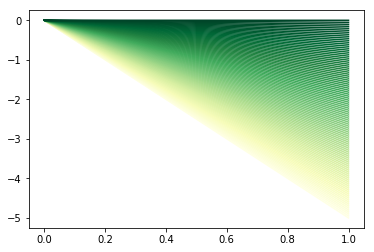

In [7]:
N = 100
y = np.linspace(-5,0,N)
colors = Gradient(y)

for yy, c in zip(y, colors):
    plt.plot( [0,1], [1e-3,yy], color=c )


In [13]:
for x in np.arange(1,100):
    p.Process( np.sin, x )



AssertionError: group argument must be None for now

In [6]:
B0 = (3*1.96e-7**2)**(1./2)  # Gauss
z0 = 60
print( B0, 1e-9 / ( B0/(1+z0)**2 ) , "Gauss")

3.3948195828349994e-07 10.960818120686723 Gauss


In [14]:
a = np.arange(0.1,6.0,0.1)
a[9:30:10]

array([1., 2., 3.])

([<matplotlib.axis.YTick at 0x7fa4c73f4400>,
 <a list of 9 Text yticklabel objects>)

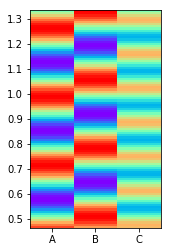

In [79]:
N=100
n=np.arange(N)/5
a=np.arange(N).repeat(3).reshape(N,3)

a = np.array([np.sin(n), np.cos(n), np.sin(n)*np.cos(n)]).transpose()

x = np.round(np.arange(0.5,1.4,0.1),1)
y = np.arange(-1,2)
y_labels = ['A','B','C']


plt.imshow( a, cmap=rainbow, extent=[0,30,0,50] )
plt.xticks( [5,15,25], y_labels )
plt.yticks( np.linspace(2,48,len(x)), x )

In [82]:
plt.imshow?
from matplotlib.colors import LogNorm
LogNorm?

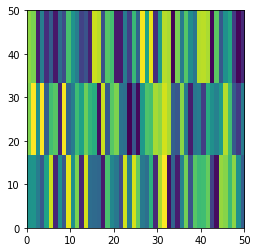

In [69]:
plt.imshow(np.random.rand(3,50), aspect='equal', extent=[0,50,0,50])

In [52]:
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.cosmology import Planck15
from scipy import integrate

z1 = 0.01

dist1 = Distance(unit=u.pc, z = z1, cosmology = Planck15)

dist1.pc


44595101.92007588

In [63]:
rho_crit = Planck15.critical_density0.value # g/cm3
omega_b = Planck15.Ob0
omega_m = Planck15.Om0
omega_L = Planck15.Ode0
m_p = 1.67e-24 # g
mu_e = 1.16
c = 2.99e8 # m/s
H_0 = 1./Planck15.hubble_time.value

n_e = rho_crit * omega_b  / m_p / mu_e

def DM(z, f_IGM=0.82):
    return n_e * f_IGM *c/H_0* integrate.quad( lambda z: (1+z)/( omega_m*(1+z)**3 + omega_L )**0.5, 0, z)[0]
    #return n_e * f_IGM * Distance( unit=u.pc, z = z, cosmology = Planck15).parsec

check here that $C$ in $DM(z|C) = C\times z \times 1000$ pc cm$^{-3}$ is indeed $f_{\rm IGM}$: compare expectation according to $f_{\rm IGM}$ (solid, see equation above) to $DM(z|f_{\rm IGM})$ (dotted). The two cases are identical until redshift $z=3$, where the assumption of fully ionized helium might break as well.

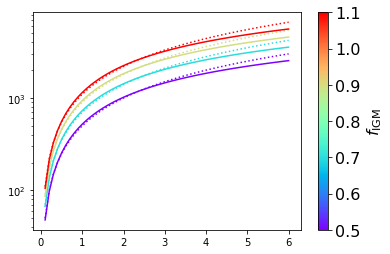

In [99]:

zs = np.linspace(0.1,6,60)
ps = np.arange(0.5,1.1,0.1)[::2]
f_IGM0s = np.arange( 0.3,1.0,0.1 )
for p, color in zip( ps, Rainbow(ps) ):
    DMs = [ DM(z, f_IGM=p) for z in zs ]
#    plt.plot(zs, DMs/(zs*1000*p), color=color)
    plt.plot(zs, DMs, color=color)
    plt.plot( zs, zs*1000*p, color=color, linestyle=":")
plt.yscale('log')
#plt.xlim(0,1)
Colorbar( ps, label=r"$f_{\rm IGM}$" )


Simulations show that at $z \gtrsim 1.5$ about 90 % of baryons were contained in the IGM (Meiskin 2008, 0711.3358). Here we check how much results for a linear evolution of $f_{\rm IGM}$ between redshifts $z=1.5$ and $z=0$ (solid) would differ from constant $f_{\rm IGM}$ (dotted). The right plot shows the ratio of the two graphs.

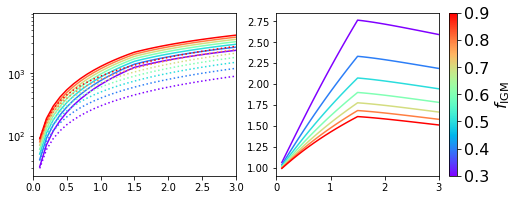

In [102]:

zs = np.linspace(0.1,6,60)
ps = np.arange(0.5,1.1,0.1)[::2]
p = 1
f_IGM0s = np.arange( 0.3,1.0,0.1 )

fig, axs = plt.subplots(1,2, figsize=(8,3))

for f_IGM0, color in zip( f_IGM0s, Rainbow(f_IGM0s) ):
    f_IGMs = f_IGM0 + np.where( zs<1.5, zs, 1.5)/1.5 * 0.50
    DMs = [ DM(z, f_IGM=f_IGM) for z, f_IGM in zip( zs, f_IGMs ) ]
    axs[1].plot(zs, DMs/(zs*1000*f_IGM0), color=color)
    axs[0].plot(zs, DMs, color=color)
    axs[0].plot( zs, zs*1000*f_IGM0, color=color, linestyle=":")
for ax in axs:
    ax.set_xlim(0,3)
axs[0].set_yscale('log')
Colorbar( f_IGM0s, label=r"$f_{\rm IGM}$" )


In [2]:
import DM_Hackstein

In [19]:
LoS = DM_Hackstein.Sightline( 1, 1e-3 )

0.0  %
16.666666666666668  %
33.333333333333336  %
50.0  %
66.66666666666667  %
83.33333333333333  %


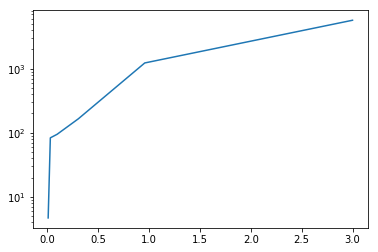

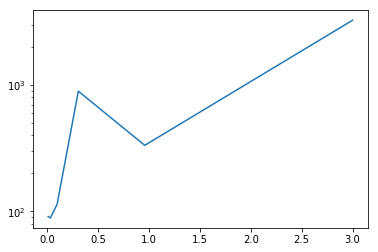

this took 346 seconds or 5.8 minutes


In [20]:

z, DM, RM = HowLong( LoS.MC_DM_RM, 1, 0.01, 3, 6 ) 

plt.plot(z,DM)
plt.yscale('log')
plt.show()
plt.plot(z,np.abs(RM))
plt.yscale('log')
plt.show()


this took 103 seconds or 1.7 minutes


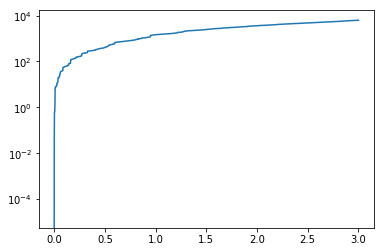

In [22]:


zs, dens = LoS.CreateArrays( 3.0 )
DMs = HowLong( LoS.DispersionMeasure, dens, zs )
plt.plot( zs, DMs)
plt.yscale('log')


In [57]:
z_max = 0.01
t0 = time()

def next(z):
    return z + JeansLength(z)

za = np.array([0])
z=0.
while z<z_max:
    z = next(za[-1])
    za = np.append(za,z)

#za = [ lambda z: z + JeansLength(z) while z < z_max ]

print(za)


t1 = time()

za = np.array([0])
z=0.
while z<z_max:
    z = za[-1] + JeansLength(za[-1])
    za = np.append(za,z)
print(za)
t2 = time()

print( "first was %f faster" % ( (t2-t1)/(t1-t0) )  )

[0.         0.0005199  0.00103979 0.00155967 0.00207953 0.00259939
 0.00311924 0.00363908 0.00415891 0.00467873 0.00519855 0.00571835
 0.00623815 0.00675794 0.00727772 0.00779749 0.00831726 0.00883702
 0.00935677 0.00987651 0.01039624]
[0.         0.0005199  0.00103979 0.00155967 0.00207953 0.00259939
 0.00311924 0.00363908 0.00415891 0.00467873 0.00519855 0.00571835
 0.00623815 0.00675794 0.00727772 0.00779749 0.00831726 0.00883702
 0.00935677 0.00987651 0.01039624]
first was 0.988528 faster


In [7]:
from astropy.cosmology import Planck15, z_at_value
import astropy.units as u
def JeansLength(z):
    """                                                                                                                     
    Computes Jeans length in unitless Delta z                                                                               
    lambda_J=2.3 Mpc (1+z)^-3/2 Pshirkov 2016                                                                               
    """
    dist=Planck15.lookback_distance(z).value # in Mpc                                                                       
    jeanslength=2.3*(1+z)**(-1.5)              # in Mpc                                                                     
    z1=z_at_value(Planck15.lookback_distance,(dist+jeanslength)*u.Mpc)
    return z1-z


In [72]:
N = 10
print( 100.*(2*N+1)/60 )

35.0


In [6]:
a = range(5)
l = []
for i, j in zip(a,a[1:]):
    l.append( [i,j])


In [12]:
'alpha1-3rdabc'[:10]

'alpha1-3rd'

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

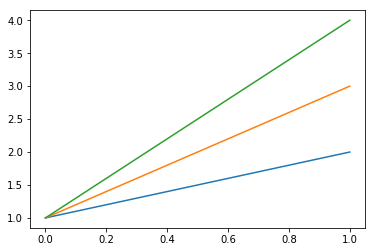

In [28]:
fig, ax = plt.subplots()

ax.plot([1,2], label='A')
ax.plot([1,3], label='B')
ax.plot([1,4], label='C')
ax.get_children()

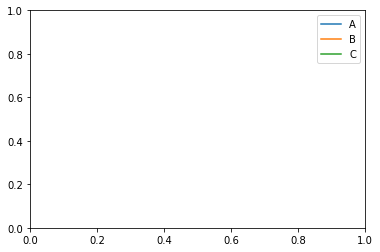

In [30]:
plt.legend(ax.get_children()[:3], ['A','B','C'])

/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:34: RuntimeWarning: divide by zero encountered in power
  res =  ( P*np.diff(x)*N )**-0.5


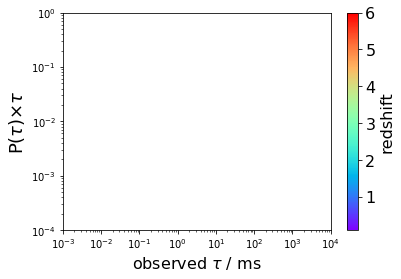

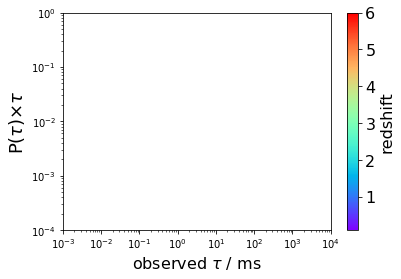

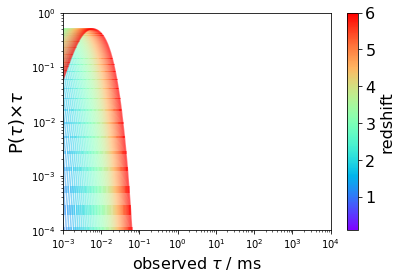

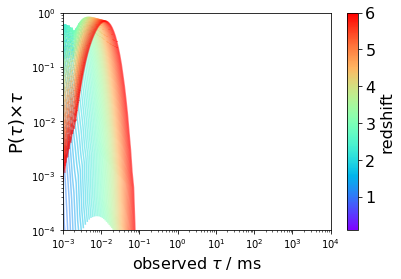

In [15]:
measure='DM'
measure='RM'
measure='tau'

dev=True

PlotLikelihoodEvolution(measure=measure, colorbar=True, dev=dev, scenario={ 'IGM':['primordial'] })
plt.ylim(1e-4,1)
plt.xlim(1e-3,1e4)
plt.show()

PlotLikelihoodEvolution(measure=measure, colorbar=True, dev=dev, scenario={ 'Host':['Rodrigues18'] })
plt.ylim(1e-4,1)
plt.xlim(1e-3,1e4)
plt.show()

PlotLikelihoodEvolution(measure=measure, colorbar=True, dev=dev, scenario={ 'Local':['Piro18/wind'] })
plt.ylim(1e-4,1)
plt.xlim(1e-3,1e4)
plt.show()

PlotLikelihoodEvolution(measure=measure, colorbar=True, dev=dev, scenario={ 'IGM':['primordial'], 'Host':['Rodrigues18'], 'Local':['Piro18/wind'] })
plt.ylim(1e-4,1)
plt.xlim(1e-3,1e4)
plt.show()


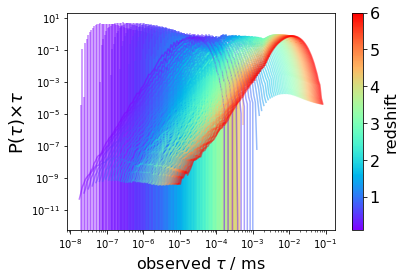

In [14]:
PlotLikelihoodEvolution(measure=measure, colorbar=True, dev=True, scenario={ 'IGM':['primordial'], 'Host':['Rodrigues18'], 'Local':['Piro18/wind'] })
#plt.ylim(1e-4,1)
#plt.xlim(1e-3,1e4)
plt.show()


In [10]:
P, x, dev=  GetLikelihood_Full( measure='tau', dev=True, redshift=1.0 , **scenario )

print( np.sum(P*np.diff(x) ) )

57294.36668971758


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:34: RuntimeWarning: divide by zero encountered in power
  res =  ( P*np.diff(x)*N )**-0.5
/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:301: RuntimeWarning: divide by zero encountered in true_divide
  dev = np.sqrt(devA**2 + devB**2) / P
/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:297: RuntimeWarning: invalid value encountered in multiply
  devA  = np.sum(P1*np.diff(x1)) *  dev * P


0.0001565402645519644

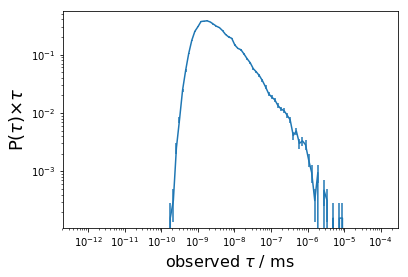

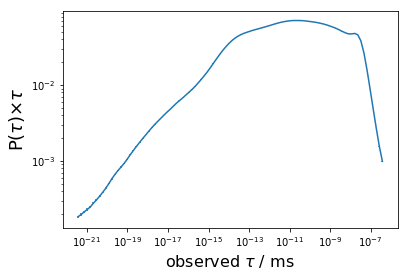

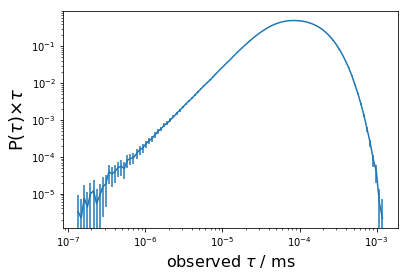

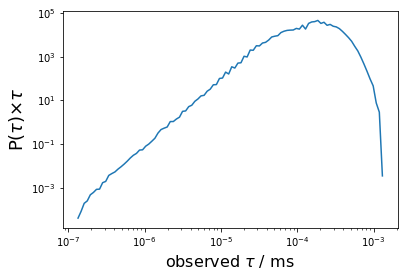

In [4]:
import h5py as h5
from PreFRBLE.convenience import *
from PreFRBLE.plot import *

scenario={ 'IGM':['primordial'], 'Host':['Rodrigues18'], 'Local':['Piro18/wind'] }
measure='tau'


Ps, xs, devs = [], [], []
for region in list(scenario.keys())[:]:
    P = GetLikelihood( redshift=1.0, measure=measure, region=region, model=scenario[region][0], dev=True)
#    print(P[2].max())
#    for i in range(len(P)):
#        print(P[i].shape, end=' ' if i < len(P)-1 else '\n' )
    Ps.append(P[0])
    xs.append(P[1])
    devs.append(P[2])
    
    PlotLikelihood( *P, measure=measure )
P = LikelihoodsConvolve(  Ps=Ps, xs=xs, devs=devs, absolute= measure=='RM', shrink=True )
    
PlotLikelihood( *P, measure=measure )

P[2].max()

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.07485545e+04 6.72857937e+06
 3.40981783e+07 4.60967759e+07 3.61819897e+07 2.26910265e+07
 1.34335314e+07 8.33802527e+06 5.22151656e+06 3.36765361e+06
 2.20274016e+06 1.34508726e+06 8.52935004e+05 5.41512776e+05
 3.38720916e+05 2.309425

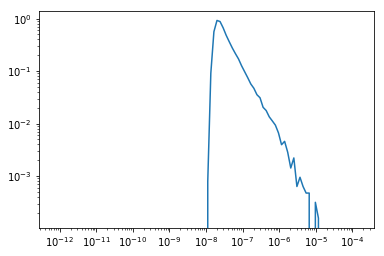

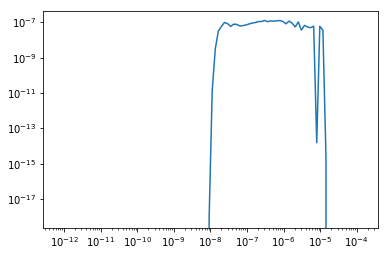

In [6]:
i, j = 0, 1
print(Ps[i])
P, x = LikelihoodConvolve( f=Ps[i], x_f=xs[i], g=np.ones(Ps[j].shape), x_g=xs[j], renormalize=False )
PlotLikelihood( P=Ps[i], x=xs[i] )
PlotLikelihood( P=P, x=x )



In [16]:
for ik, key in enumerate(scenario.keys()):
#for p, x, dev in zip(Ps, xs, devs):
    p = Ps[ik]
    x = xs[ik]
    dev = devs[ik]
    dx=np.diff(x)
    prob=p*dx
    cvl = p**2*dx*dev
    i = 50
#    i = np.where(p == p.max())
    i = np.where(prob == prob.max())
#    i = np.where(dev == dev.max())
#    i = np.where(cvl == cvl.max())
    print(  key, cvl[i], i, p[i], x[i], dx[i], p[i]*dx[i], dev[i] )
    
PP = P[0] * np.diff(P[1])
i = np.where(PP == PP.max())
print(P[0][i], P[1][i], np.diff(P[1])[i], P[2][i])
    

Local [0.0308181] (array([70]),) [143.90711594] [0.00331533] [0.00031869] [0.0458614] [0.00466956]
IGM [87626.70457576] (array([53]),) [46096775.9408454] [1.80563837e-08] [3.85303096e-09] [0.1776123] [0.01070269]
Host [59793.89466948] (array([93]),) [5.6080437e+08] [2.3802989e-10] [2.02712027e-10] [0.11368179] [0.0009379]
[77.72388118] [0.00999872] [0.00096147] [5.89494208e+12]


In [19]:
N_z = 60
N_T = 3
N_P = 3
N_f = 7
N_B = 9
t_SM = 2
t_DM = 2
t_RM = 30

T_SM = t_SM * N_z * N_T * N_P / 3600
T_DM = t_DM * N_z * N_T * N_P * N_f / 3600
T_RM = t_RM * N_z * N_T * N_P * N_f * N_B / 3600

print( T_SM, T_DM, T_RM)


0.3 2.1 283.5


In [22]:
T_RM/N_B/N_T

10.5

Use this to wipe all entries of a scenario

In [20]:
from time import sleep
import h5py as h5

scenario={ 
    'IGM':['alpha1-3rd_C300'], 
    'Host':['Rodrigues18'], 
    'Local':['Piro18/wind'] 
}

KeyFull( measure='RM', axis='', redshift=1., **scenario )


with h5.File( '/hummel/PreFRBLE/likelihood/observables_likelihood_Full.h5' ) as f:
#    for B in [1,2,3,4,5,6,7,8,9]: 
    f.__delitem__( "/alpha2-3rd_C300/Rodrigues18/Piro18/wind/1.3/RM" )
    for B in [2,6]: 
        for F in [3,4,5,6,7,8,9]: 
            tmp = scenario.copy()
            tmp['IGM'] = ['alpha{0}-3rd_C{1}00'.format(B,F)], 
            for z in redshift_bins: 
                key = KeyFull( measure='RM', axis='', redshift=z, **tmp )
                print( f[key] )
                try:
                    print( f[key].keys(), end=' ' )
                    print( key )
#                    f.__delitem__( key )
                except:
                    pass
                sleep(5e-3)

/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/ipykernel_launcher.py:13: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  del sys.path[0]


KeyError: "Couldn't delete link (bad symbol table node signature)"

Recover HDF5 file with broken nodes

In [1]:
file_broken = '/hummel/PreFRBLE/likelihood/observables_likelihood_Full.h5'
file_recover = '/hummel/PreFRBLE/likelihood/observables_likelihood_Full_recover.h5'

import h5py as h5

def RecoverFile( f1, f2 ):
    """  recover read-open HDF5 file f1 to write-open HDF5 file f2  """
    names = []
    f1.visit(names.append)
    for n in names:
        try:
            f2.create_dataset( n, data=f1[n][()] )
        except:
            pass

        

In [ ]:
with h5.File( file_broken, 'r' ) as fb:
    with h5.File( file_recover, 'w' ) as fr:
        for key in fb.keys():
            try:
                fr.create_group(key)
                RecoverFile( fb[key], fr[key] )
            except:
                fr.__delitem__(key)
        
        

In [ ]:
VisitFile(file_broken)

In [135]:
fn1 = 'tmp_A.h5'
fn2 = 'tmp_B.h5'

with h5.File(fn1, 'w') as f1:
    f1.create_dataset('/A/A', data=[1])
    f1.create_dataset('/B/B/B', data=[2])
    f1.create_dataset('/C/C', data=[3])
    f1.create_dataset('/D', data=[4])
VisitFile( fn1 )

try:
    os.remove( fn2 )
except:
    pass

<KeysViewHDF5 ['A', 'B', 'C', 'D']>
A/A (1,)
B/B/B (1,)
C/C (1,)
D (1,)


In [136]:
with h5.File( fn1, 'r' ) as fb:
    with h5.File( fn2, 'w' ) as fr:
        for key in fb.keys():
            RecoverFile( fb, fr)
            try:
                fr.create_group(key)
                RecoverFile( fb[key], fr[key] )
            except:
                fr.__delitem__(key)
VisitFile(fn2)        
        

<KeysViewHDF5 ['A', 'B', 'C']>
A/A (1,)
B/B/B (1,)
C/C (1,)


In [7]:
with h5.File( '/hummel/PreFRBLE/likelihood/observables_likelihood_Full.h5', 'r' ) as f:
    sc = {'IGM': ['alpha1-3rd_C500'], 'Host': ['Rodrigues18'], 'Local': ['Piro18/wind']}
    key = KeyFull( measure='RM', axis='P', redshift=1.0,  **sc )
    print( f[key].value.shape)

(100,)


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.


In [3]:
def VisitFile( filename ):
    with h5.File(filename, 'r') as f:
        print(f.keys())
        names = []
        f.visit(names.append)
        for n in names:
            try: print(n, f[n][()].shape)
            except: pass